In [2]:
import pandas as pd

sentiment_index_df = pd.read_excel('https://raw.githubusercontent.com/inga-maria01/master_thesis/main/index/sentiment_index_unweighted_v7.xlsx')
sentiment_index_df.set_index('date', inplace=True)
sentiment_index_df.head()

,sentiment_score,sentiment_slope
date,,
2015-01-01,17.132027,-1.195109
2015-01-02,14.827878,-0.130807
2015-01-03,18.088204,0.938619
2015-01-04,16.568480,1.079692
2015-01-05,18.532825,-1.688521


In [2]:
nasdaq_100_df = pd.read_csv('https://raw.githubusercontent.com/inga-maria01/master_thesis/main/data/Nasdaq100_price_data.csv')
nasdaq_100_df['Date'] = pd.to_datetime(nasdaq_100_df['Date'])
nasdaq_100_df.set_index('Date', inplace=True)
nasdaq_100_df = nasdaq_100_df[1:]
nasdaq_100_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,4258.600098,4276.709961,4206.459961,4230.240234,4230.240234,1435150000
2015-01-05,4206.549805,4210.959961,4151.850098,4160.959961,4160.959961,1794470000
2015-01-06,4174.779785,4176.259766,4090.330078,4110.830078,4110.830078,2167320000
2015-01-07,4139.850098,4169.970215,4126.390137,4160.000000,4160.000000,1957950000
2015-01-08,4195.490234,4247.930176,4192.629883,4240.549805,4240.549805,2105450000


In [10]:
nasdaq_100_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,8703.059570,8710.900391,8690.150391,8696.009766,8696.009766,2028670000
2019-12-24,8705.299805,8708.219727,8684.120117,8699.509766,8699.509766,1014530000
2019-12-26,8717.950195,8778.330078,8716.030273,8778.309570,8778.309570,1639960000
2019-12-27,8805.860352,8811.099609,8749.860352,8770.980469,8770.980469,1833740000
2019-12-30,8766.389648,8768.299805,8671.919922,8709.730469,8709.730469,2051320000


### Plot sentiment index & Nasdaq-100

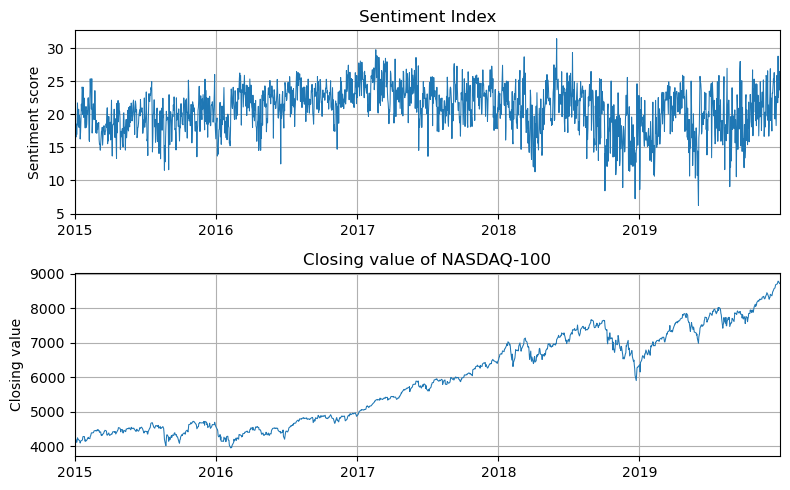

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Assuming the data frames 'sentiment_index_df' and 'nasdaq_100_df' have a datetime index
start_date = sentiment_index_df.index.min()
end_date = sentiment_index_df.index.max()


plt.figure(figsize=(8, 5))


plt.subplot(2, 1, 1)
plt.plot(sentiment_index_df['sentiment_score'], linewidth=0.75)
plt.ylabel('Sentiment score')
plt.title('Sentiment Index')
plt.grid(True)
plt.xlim([start_date, end_date])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


plt.subplot(2, 1, 2)
plt.plot(nasdaq_100_df['Close'], linewidth=0.75)
plt.ylabel('Closing value')
plt.title('Closing value of NASDAQ-100')
plt.grid(True)
plt.xlim([start_date, end_date])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


plt.tight_layout()  # Adjusts subplot params to give some padding
#plt.savefig('sent_and_ndq')
plt.show()


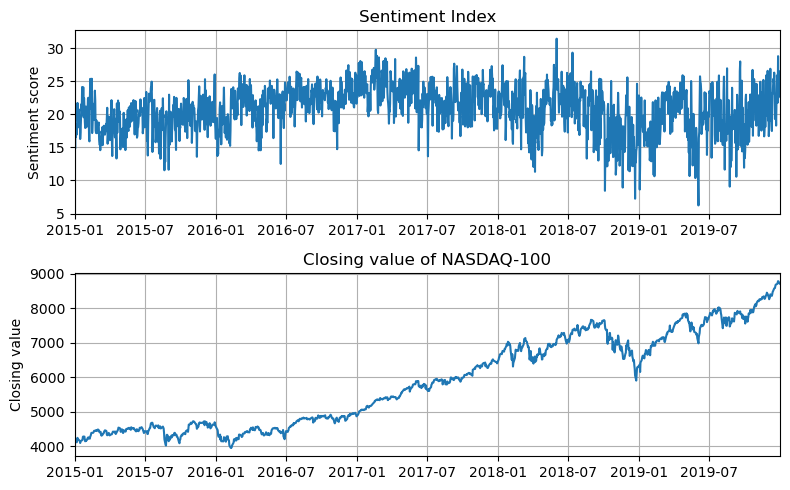

In [4]:
import matplotlib.pyplot as plt

# Assuming the data frames 'sentiment_index_df' and 'nasdaq_100_df' have a datetime index
start_date = sentiment_index_df.index.min()
end_date = sentiment_index_df.index.max()

plt.figure(figsize=(8, 5))

plt.subplot(2, 1, 1)
plt.plot(sentiment_index_df['sentiment_score'])
plt.ylabel('Sentiment score')
plt.title('Sentiment Index')
plt.grid(True)
plt.xlim([start_date, end_date])

plt.subplot(2, 1, 2)
plt.plot(nasdaq_100_df['Close'])
plt.ylabel('Closing value')
plt.title('Closing value of NASDAQ-100')
plt.grid(True)
plt.xlim([start_date, end_date])

plt.tight_layout()  # Adjusts subplot params to give some padding
plt.show()


### Plot sentiment index & sentiment index with future 5-day MA
only plot working days

In [45]:
sentiment_idx_working_d = sentiment_index_df.copy()
sentiment_idx_working_d = sentiment_idx_working_d[~sentiment_idx_working_d.index.isin(sentiment_idx_working_d.index.difference(nasdaq_100_df.index))]
sentiment_idx_working_d.head()

,sentiment_score,sentiment_slope
date,,
2015-01-02,14.827878,-0.130807
2015-01-05,18.532825,-1.688521
2015-01-06,16.950898,-0.425215
2015-01-07,18.343075,-1.852799
2015-01-08,21.728897,0.104260


In [46]:
sentiment_idx_working_d['sentiment_ma_next_5'] = sentiment_idx_working_d['sentiment_score'].rolling(window=5).mean().shift(-4)
sentiment_idx_working_d.head()

,sentiment_score,sentiment_slope,sentiment_ma_next_5
date,,,
2015-01-02,14.827878,-0.130807,18.076714
2015-01-05,18.532825,-1.688521,18.956857
2015-01-06,16.950898,-0.425215,18.856387
2015-01-07,18.343075,-1.852799,19.425886
2015-01-08,21.728897,0.104260,19.629579


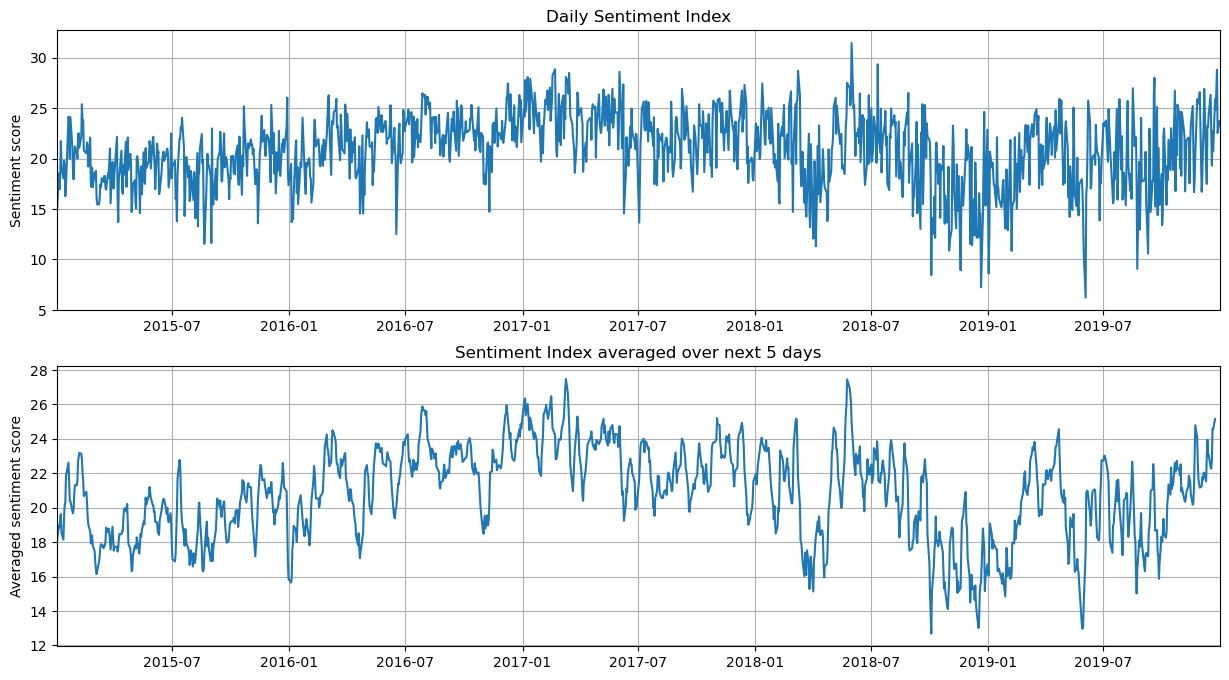

In [47]:
import matplotlib.pyplot as plt

start_date = sentiment_idx_working_d.index.min()
end_date = sentiment_idx_working_d.index.max()

plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
plt.plot(sentiment_idx_working_d['sentiment_score'])
plt.ylabel('Sentiment score')
plt.xlim([start_date, end_date])
# plt.xlabel('time')
plt.title('Daily Sentiment Index')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(sentiment_idx_working_d['sentiment_ma_next_5'])
plt.ylabel('Averaged sentiment score')
plt.xlim([start_date, end_date])
plt.title('Sentiment Index averaged over next 5 days')
plt.grid(True)
plt.show()

### Plot market cap

In [5]:
# Load market cap file

market_cap_path = "https://raw.githubusercontent.com/inga-maria01/master_thesis/main/data/market_cap/total_market_cap_2015-2019.xlsx"

market_cap_df = pd.read_excel(market_cap_path).sort_values("date").reset_index(drop=True)

market_cap_df['date'] = pd.to_datetime(market_cap_df['date'])

market_cap_df['weights_abs'] = market_cap_df['weights_abs'].astype(int)

market_cap_df['weights_rel'] = market_cap_df.groupby('date')['weights_abs'].transform(lambda x: x / x.sum())

# replace company ticker by company name for a smooth join

replacements = {"AAPL.O": "AAPL", "AMZN.O": "AMZN", "GOOG.O": "GOOGLE", "MSFT.O": "MSFT", "TSLA.O": "TSLA"}

market_cap_df['company_ticker'] = market_cap_df['company_ticker'].replace(replacements)

market_cap_df.rename(columns={'company_ticker': 'ticker_symbol'}, inplace=True)
market_cap_df.set_index('date', inplace=True)


In [6]:
market_cap_df

,ticker_symbol,weekday,market_cap,weights_abs,weights_rel
date,,,,,
2015-01-02,AAPL,4,6.412030e+11,697510000000,0.422972
2015-01-02,TSLA,4,2.749748e+10,30660000000,0.018592
2015-01-02,GOOGLE,4,3.576201e+11,370020000000,0.224381
2015-01-02,MSFT,4,3.854358e+11,394090000000,0.238977
2015-01-02,AMZN,4,1.434618e+11,156790000000,0.095078
...,...,...,...,...,...
2019-12-31,MSFT,1,1.203063e+12,1154848594452,0.275336
2019-12-31,AMZN,1,9.161539e+11,892831633776,0.212867
2019-12-31,AAPL,1,1.304765e+12,1187462571250,0.283112


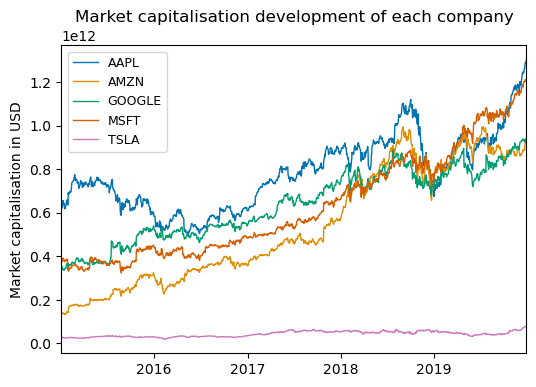

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

plt.figure(figsize=(6, 4))
sns.set_palette('colorblind')

companies = np.sort(market_cap_df['ticker_symbol'].unique())
for company in companies:
    company_data = market_cap_df[market_cap_df['ticker_symbol'] == company]
    plt.plot(company_data.index, company_data['market_cap'], label=company, linewidth = 1)

plt.ylabel('Market capitalisation in USD')
plt.title('Market capitalisation development of each company')
plt.legend(fontsize = 9)
plt.xlim(market_cap_df.index.min(), market_cap_df.index.max()) 
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# plt.grid(True)
plt.show()